In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

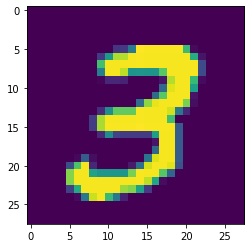

In [8]:
plt.imshow(X_train[7])

In [9]:
y_train[2]

4

In [10]:
y_train[:1]

array([5], dtype=uint8)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

Till the above processes we just converted the 2D arrays to 1D array. Now we will create our simple neural network.

In [14]:
model=keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])#means stack of layers in my neural network, so every layer is one input.Dense means all connected to all other layers.10 is total output neurons number 0 to 9 so 10.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 331us/sample - loss: 0.4922 - accuracy: 0.8770
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3068 - accuracy: 0.9159
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2857 - accuracy: 0.9208
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2751 - accuracy: 0.9235
Epoch 5/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2682 - accuracy: 0.9260


As accuracy was less we will go back & sclae the values by dividing 255 each value in matrix. We see now, accuracy is till 92%.

In [15]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.2667 - accuracy: 0.9263


[0.26665770141482353, 0.9263]

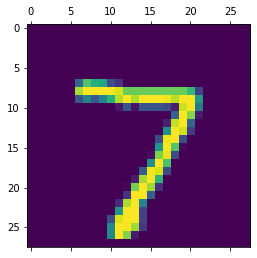

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

array([1.7513512e-05, 1.2954948e-10, 3.7845446e-05, 7.5434493e-03,
       1.1332983e-06, 7.7339238e-05, 1.8116595e-09, 7.2388548e-01,
       6.9487440e-05, 6.4463745e-04], dtype=float32)

This above array has ten values, as it is printing 10 scores of output layer of the neural model. We will use the max score of all as it gives the true result prediction we need.

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
model=keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')#hidden layer
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2987 - accuracy: 0.9169
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1413 - accuracy: 0.9584
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1015 - accuracy: 0.9697
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0774 - accuracy: 0.9771
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0630 - accuracy: 0.9808


In [20]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.0884 - accuracy: 0.9739


[0.08839030076893978, 0.9739]

In [21]:
model=keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),#to flatten the image in the model it self
     keras.layers.Dense(100,activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')#hidden layer
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2958 - accuracy: 0.9161
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1383 - accuracy: 0.9597
Epoch 3/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0996 - accuracy: 0.9707
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0780 - accuracy: 0.9762
Epoch 5/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0624 - accuracy: 0.9816


In [22]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.0879 - accuracy: 0.9742


[0.087896211713925, 0.9742]

In [23]:
X_test[1].shape

(28, 28)

In [24]:
import ipywidgets as widgets
import ipycanvas  as canvas

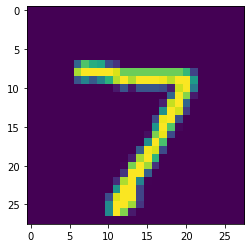

In [25]:
y=model.predict(X_test[:1])
plt.imshow(X_test[0])

In [26]:
np.argmax(y)

7

In [27]:
y

array([[7.0737917e-07, 2.8754448e-08, 3.5095905e-05, 1.0865896e-03,
        1.6789693e-09, 3.3694619e-07, 6.1714722e-10, 4.0123734e-01,
        3.5302330e-07, 4.3410450e-06]], dtype=float32)

In [28]:
upload_digit=widgets.FileUpload(
    accept='image/*',  
    multiple=False
)
upload_digit

FileUpload(value={}, accept='image/*', description='Upload')

In [29]:
upload_digit_2=widgets.FileUpload(
    accept='image/*',  
    multiple=False
)
upload_digit_2

FileUpload(value={}, accept='image/*', description='Upload')

In [31]:
content = upload_digit.value[list(upload_digit.value.keys())[0]]['content']
with open('myfile', 'wb') as f: f.write(content)
content_2 = upload_digit_2.value[list(upload_digit_2.value.keys())[0]]['content']
with open('myfile_2', 'wb') as f_2: f_2.write(content)

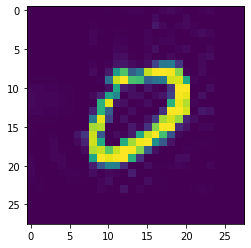

In [32]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(f.name))

In [33]:
from PIL import Image
from numpy import array
img = Image.open(f.name)
ar = array(img)
ar=ar/255

In [34]:
ar

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.00392157, 0.00784314, 0.00784314,
        0.        , 0.00392157, 0.01568627, 0.02352941, 0.00784314,
        0.        , 0.        , 0.00784314, 0.01568627, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02745098, 0.        , 0.        , 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0627

In [35]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
ar.shape

(28, 28)

In [37]:
new=model.predict([X_test])
np.argmax(new[0])

7

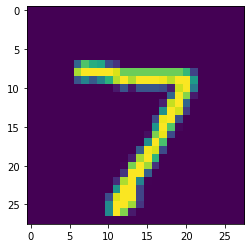

In [38]:
plt.imshow(X_test[0])

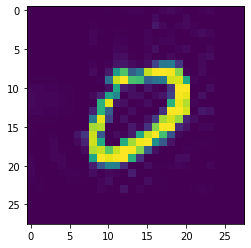

In [39]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(f_2.name))

In [40]:
from PIL import Image
from numpy import array
img_2 = Image.open(f.name)
ar_2 = array(img_2)
ar_2=ar_2/255

In [41]:
ar_2.shape

(28, 28)

In [42]:
ar_n=[ar,ar_2]

In [43]:
len([ar_n])

1

In [44]:
new_2=model.predict([ar_n])

In [45]:
new_2

array([[3.7907735e-02, 1.4212681e-06, 2.8910870e-03, 9.8218181e-05,
        1.7421186e-03, 3.5492797e-06, 1.6304710e-05, 5.5295043e-04,
        1.2020007e-05, 3.9617237e-02],
       [3.7907735e-02, 1.4212681e-06, 2.8910870e-03, 9.8218181e-05,
        1.7421186e-03, 3.5492797e-06, 1.6304710e-05, 5.5295043e-04,
        1.2020007e-05, 3.9617237e-02]], dtype=float32)

In [46]:
new_2[1]

array([3.7907735e-02, 1.4212681e-06, 2.8910870e-03, 9.8218181e-05,
       1.7421186e-03, 3.5492797e-06, 1.6304710e-05, 5.5295043e-04,
       1.2020007e-05, 3.9617237e-02], dtype=float32)

In [47]:
np.argmax(new_2[1])

9

In [48]:
from tkinter import *
import PIL
from PIL import *
from PIL import Image, ImageFont, ImageDraw 
import turtle
import kivy

[INFO   ] [Logger      ] Record log in C:\Users\admin\.kivy\logs\kivy_21-12-03_3.txt
[INFO   ] [deps        ] Successfully imported "kivy_deps.angle" 0.3.0
[INFO   ] [deps        ] Successfully imported "kivy_deps.glew" 0.3.0
[INFO   ] [deps        ] Successfully imported "kivy_deps.sdl2" 0.3.1
[INFO   ] [Kivy        ] v2.0.0
[INFO   ] [Kivy        ] Installed at "C:\Users\admin\Anaconda3\lib\site-packages\kivy\__init__.py"
[INFO   ] [Python      ] v3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
[INFO   ] [Python      ] Interpreter at "C:\Users\admin\Anaconda3\python.exe"


In [49]:
apple = np.load('apple.npy')

In [50]:
apple

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [51]:
apple[0].shape

(784,)

In [52]:
apple=apple/255
apple[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04313725, 0.08235294, 0.04705882,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.36078431, 0.07843137,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.35686275, 0.83529412,
       0.99215686, 1.        , 1.        , 0.87058824, 0.37254

In [53]:
apple_y=np.array([0]*len(apple[:50]))
apple_x=apple[:50]
model_objects=keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')#hidden layer
])
model_objects.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_objects.fit(apple_x,apple_y,epochs=5)

Train on 50 samples
Epoch 1/5
50/50 [==============================] - 7s 135ms/sample - loss: 2.0566 - accuracy: 0.6400
Epoch 2/5
50/50 [==============================] - 0s 220us/sample - loss: 1.7517 - accuracy: 1.0000
Epoch 3/5
50/50 [==============================] - 0s 230us/sample - loss: 1.5653 - accuracy: 1.0000
Epoch 4/5
50/50 [==============================] - 0s 260us/sample - loss: 1.3826 - accuracy: 1.0000
Epoch 5/5
50/50 [==============================] - 0s 220us/sample - loss: 1.1768 - accuracy: 1.0000


In [54]:
apple_test=apple[50:70]
apple_y_test=np.array([0]*len(apple_test))

In [55]:
apple_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05490196, 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.29019608, 1.        , 0.23137255, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

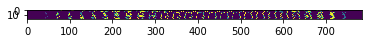

In [56]:
plt.imshow(apple_test)

In [60]:
import os
import cv2
shapes={'circle':0,'square':1, "triangle": 2}
X = []
y = []

X_train_t = []
y_train_t = []
X_test_t = []
y_test_t = []

for shape in shapes:
    pth='C:/Users/admin/Downloads/shapes'+'/'+shape
    temp_shape = []
    temp_target = []
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(28,28))
        temp_shape.append(img)
        temp_target.append(shapes[shape])
        X.append(img)
        y.append(shapes[shape])
    X_train_t.extend(temp_shape[:int(len(temp_shape) * 0.8)])
    y_train_t.extend(temp_target[:int(len(temp_target) * 0.8)])
    X_test_t.extend(temp_shape[int(len(temp_shape) * 0.8):])
    y_test_t.extend(temp_target[int(len(temp_target) * 0.8):])

In [62]:
model_n=keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),#to flatten the image in the model it self
     keras.layers.Dense(100,activation='relu'),
     keras.layers.Dense(3,activation='sigmoid')#hidden layer
])
model_n.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
array_x = np.array(X_train_t)

In [70]:
array_y=np.array(y_train_t)

In [72]:
arrayxt=np.array(X_test_t)
arrayyt=np.array(y_test_t)
array_x=array_x/255
arrayxt=arrayxt/255

In [73]:
model_n.fit(array_x,array_y,epochs=5)

Train on 8964 samples
Epoch 1/5
8964/8964 [==============================] - 7s 803us/sample - loss: 0.1673 - accuracy: 0.9421
Epoch 2/5
8964/8964 [==============================] - 1s 101us/sample - loss: 0.0429 - accuracy: 0.9921
Epoch 3/5
8964/8964 [==============================] - 1s 104us/sample - loss: 0.0417 - accuracy: 0.9901
Epoch 4/5
8964/8964 [==============================] - 1s 103us/sample - loss: 0.0273 - accuracy: 0.9946
Epoch 5/5
8964/8964 [==============================] - 1s 111us/sample - loss: 0.0335 - accuracy: 0.9904


In [77]:
a=model_n.predict([arrayxt])

In [80]:
np.argmax(a[1000])

1

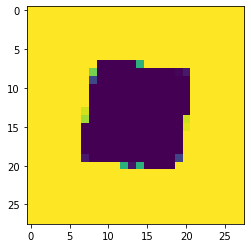

In [81]:
plt.imshow(arrayxt[1000])

In [87]:
input_img=cv2.imread('test_image.png')

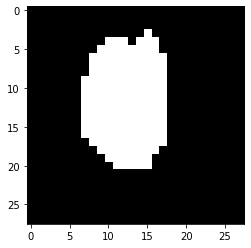

In [88]:
plt.imshow(input_img)

In [90]:
gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

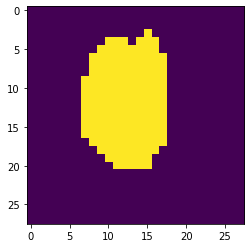

In [91]:
resized = cv2.resize(gray, (28,28))
plt.imshow(resized)

In [93]:
IMG_SIZE=28
new_img = tf.keras.utils.normalize(resized, axis=1)
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
new_img

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [97]:
# prediction = model_n.predict(new_img)
input_img = Image.open('test_image.png')
b = np.array(input_img)
b=b/255

In [98]:
b

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [99]:
b.shape

(28, 28, 3)